<a href="https://colab.research.google.com/github/jtkomati/Portfolio/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Segundo levantamento feito pela Visa o Brasil está em segundo lugar no ranking de fraudes no comércio virtual na América Latina, só atrá do México. No ranking do Banco Central do Brasil as reclamações referentes a “irregularidades relativas a integridade, confiabilidade, segurança, sigilo ou legitimidade das operações e serviços” relacionadas a cartões de crédito somaram 5.982 queixas em 2019, uma alta de 28,2% em relação ao registrado em 2018 (Valor Investe).

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>



Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto contêm transações realizadas com cartões de crédito em setembro de 2013 por portadores de cartões europeus. O *dataset* representa transações que ocorreram em dois dias, nas quais temos 492 fraudes em 284.807 transações. 

O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) representa 0,172% de todas as transações.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Inicialmente importamos os pacotes necessários incluindo bibliotecas necessárias para rodar Machine Learning.

In [4]:
# importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# configurar o notebook
sns.set_style()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Utilizamos uma arquivo já tratado pelo professor Carlos Melo em formato `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [5]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## **Análise Exploratória**

Na análise exploratória do DataFrame literalmente exploramos os dados que temos a nossa frente. O professor Carlos Melo sempre menciona que é uma etapa que demanda tempo mas é de extrema importância.

Inicialmente utilizamos o comando `df.head()` para ter um primeiro contato com o DataFrame e conhecer as 5 primeiras entradas. É o momento de ter uma visão preliminar dos dados.


**Dicionário das variáveis**

* `Time` - Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados
* `V1 a V28` pode ser resultado de uma redução de dimensionalidade da Análise de Componentes Principais (Principal Component Analysis - PCA) para proteger identidades do usuário e recursos confidenciais 
* `Amount` - Valor da transação
* `Class` - 1 para transações fraudulentas, 0 caso contrário

In [6]:
# Ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Para sabermos o resumo estatístico como quantidade, média, mínimo, máximo, etc usamos a funação `describe()`. Count significa contar em inglês. Nesse dado estatístico verificamos que são 284.807 entradas. 

In [7]:
# Ver o resumo estatístico do dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A acurácia de uma análise depende muito da qualidade dos dados e também da ausência de valores. Usando o comando `isnull().sum()`temos a somatória dos valores ausentes de cada variável. Felizmente, vemos que não existe nenhum caso de valor ausente. Porém, em casos reais, isso pode acontecer, logo não deixe de conferir os dados ausentes.

In [8]:
# Verificar se há valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Para identificar o balanceamento do *dataset*, plotamos o histograma das variáveis numéricas.  

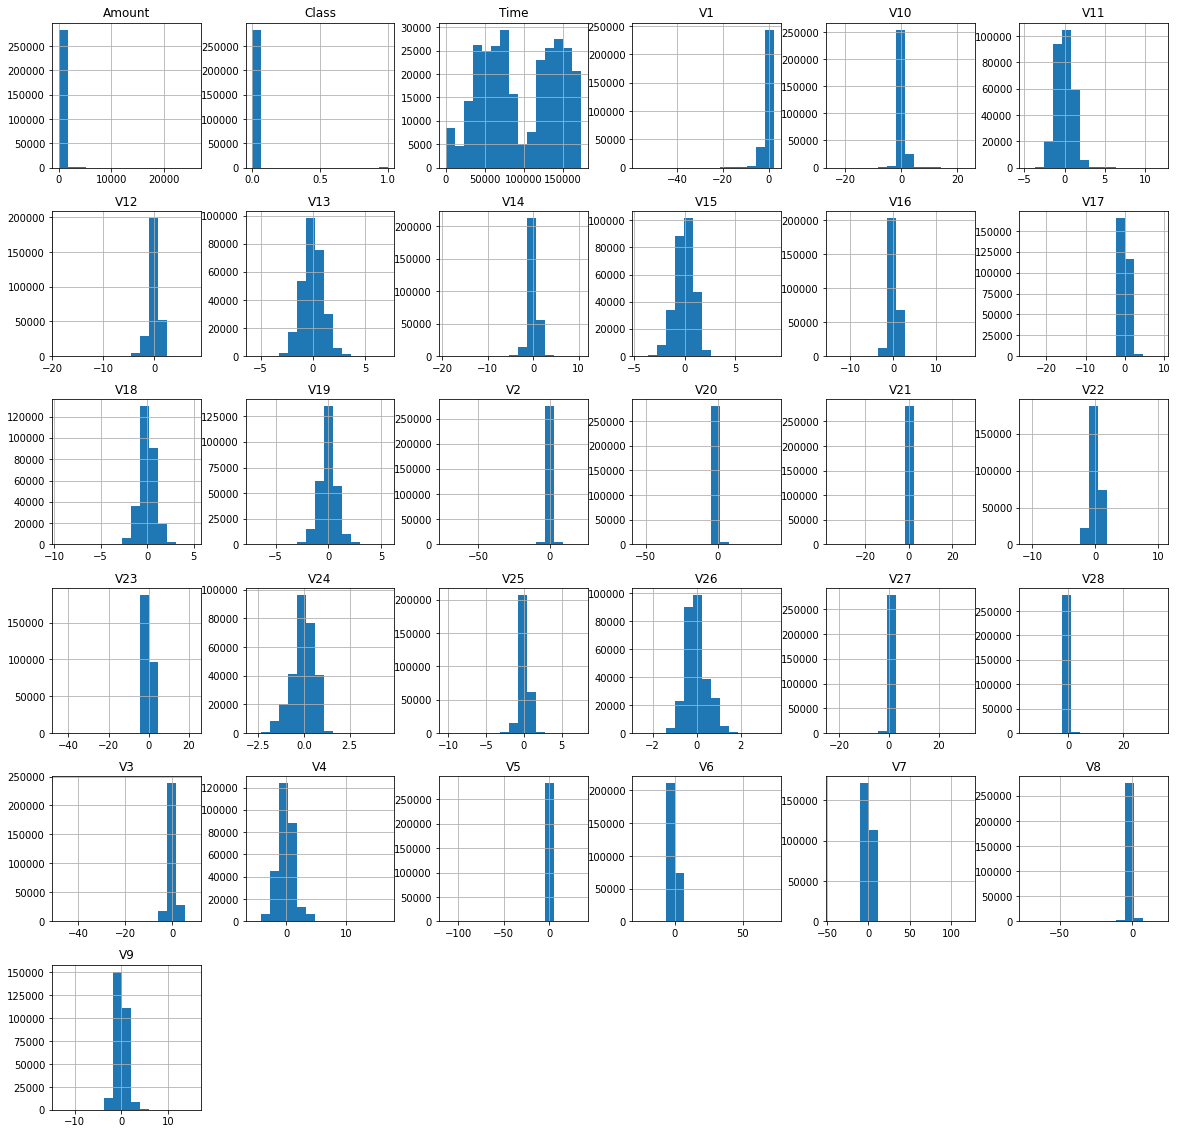

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,20));

* Abaixo analisamos especificamente o histograma da variável *Time* separadamente quando é fraude ou não:
    
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)

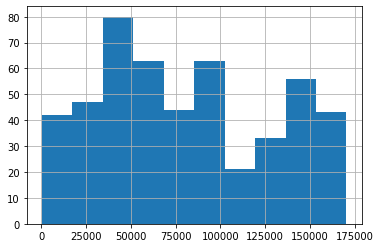

In [10]:
df.loc[df.Class == 1,"Time"].hist()

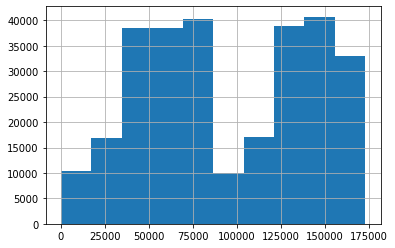

In [11]:
df.loc[df.Class == 0,"Time"].hist()

Analisamos também o histograma da variável *Amount* separadamente quando é fraude ou não:

    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)

Percebemos que a maioria das fraudes ocorre para um valor menor do que 500.

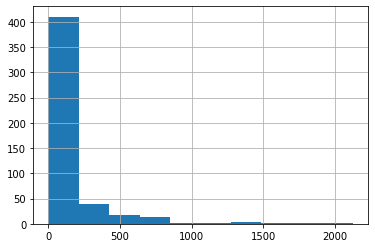

In [12]:
df.loc[df.Class == 1,"Amount"].hist()

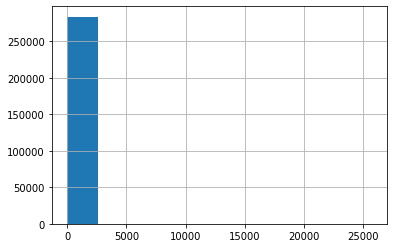

In [13]:
df.loc[df.Class == 0,"Amount"].hist()

* Plotamos um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`). Nele notamos que existem *outliers*, ou seja, valores acima do "máximo" (Q3 + 1,5 x IQR).

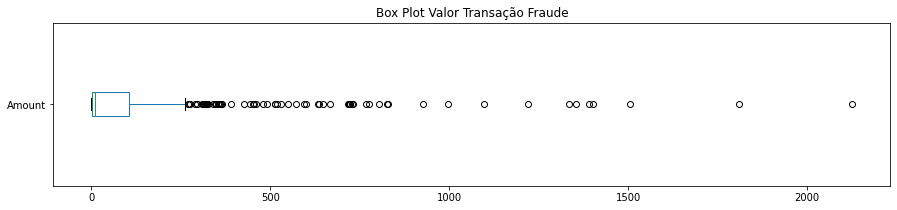

In [14]:
df_amount_fraud = df.loc[df.Class == 1,"Amount"]

fig, ax = plt.subplots(figsize=(15,3))
df_amount_fraud.plot(kind='box', vert=False);
ax.set_title('Box Plot Valor Transação Fraude')
plt.show()

* Plotamos matriz de correlação mas devido a quantidade de variáveis separamos em 4 grupos. As variáveis Time, Amount e Class entraram nos 4 grupos.

* Analisando em relação à variável Class que representa se houve ou não fraude, as variáveis V14 e V17 tiveram maior representatividade.

In [15]:
corr = df[['Time', 'Amount', 'Class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']].corr()
display(corr)

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7
Time,1.000000,-0.010596,-0.012323,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02
Amount,-0.010596,1.000000,0.005632,-2.277087e-01,-5.314089e-01,-2.108805e-01,9.873167e-02,-3.863563e-01,2.159812e-01,3.973113e-01
Class,-0.012323,0.005632,1.000000,-1.013473e-01,9.128865e-02,-1.929608e-01,1.334475e-01,-9.497430e-02,-4.364316e-02,-1.872566e-01
V1,0.117396,-0.227709,-0.101347,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15
V2,-0.010593,-0.531409,0.091289,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16
V3,-0.419618,-0.210880,-0.192961,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15
V4,-0.105260,0.098732,0.133447,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16
V5,0.173072,-0.386356,-0.094974,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16
V6,-0.063016,0.215981,-0.043643,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16
V7,0.084714,0.397311,-0.187257,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00


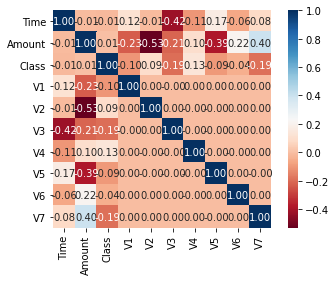

In [16]:
sns.heatmap(corr, cmap='RdBu', fmt='0.2f', square=True, linecolor='white', annot=True);

In [17]:
corr = df[['Time', 'Amount', 'Class', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']].corr()
display(corr)

,Time,Amount,Class,V8,V9,V10,V11,V12,V13,V14
Time,1.000000,-0.010596,-0.012323,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02
Amount,-0.010596,1.000000,0.005632,-1.030791e-01,-4.424560e-02,-1.015021e-01,1.039770e-04,-9.541802e-03,5.293409e-03,3.375117e-02
Class,-0.012323,0.005632,1.000000,1.987512e-02,-9.773269e-02,-2.168829e-01,1.548756e-01,-2.605929e-01,-4.569779e-03,-3.025437e-01
V8,-0.036949,-0.103079,0.019875,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16
V9,-0.008660,-0.044246,-0.097733,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-16
V10,0.030617,-0.101502,-0.216883,9.051847e-17,-2.771761e-16,1.000000e+00,2.624448e-16,1.439907e-15,-8.853582e-16,2.622513e-16
V11,-0.247689,0.000104,0.154876,1.954747e-16,4.682341e-16,2.624448e-16,1.000000e+00,3.176029e-15,1.945810e-15,3.637160e-17
V12,0.124348,-0.009542,-0.260593,-6.266057e-17,-2.445230e-15,1.439907e-15,3.176029e-15,1.000000e+00,-2.306149e-14,1.761652e-16
V13,-0.065902,0.005293,-0.004570,-2.382948e-16,-2.650351e-16,-8.853582e-16,1.945810e-15,-2.306149e-14,1.000000e+00,2.841428e-15
V14,-0.098757,0.033751,-0.302544,-1.131098e-16,2.343317e-16,2.622513e-16,3.637160e-17,1.761652e-16,2.841428e-15,1.000000e+00


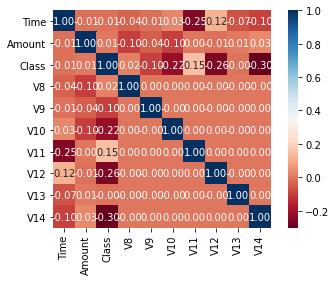

In [18]:
sns.heatmap(corr, cmap='RdBu', fmt='0.2f', square=True, linecolor='white', annot=True);

In [19]:
corr = df[['Time', 'Amount', 'Class', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21']].corr()
display(corr)

,Time,Amount,Class,V15,V16,V17,V18,V19,V20,V21
Time,1.000000,-0.010596,-0.012323,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02
Amount,-0.010596,1.000000,0.005632,-2.985848e-03,-3.909527e-03,7.309042e-03,3.565034e-02,-5.615079e-02,3.394034e-01,1.059989e-01
Class,-0.012323,0.005632,1.000000,-4.223402e-03,-1.965389e-01,-3.264811e-01,-1.114853e-01,3.478301e-02,2.009032e-02,4.041338e-02
V15,-0.183453,-0.002986,-0.004223,1.000000e+00,1.335904e-15,3.208310e-16,7.538156e-16,-8.556257e-16,3.240475e-16,1.947458e-17
V16,0.011903,-0.003910,-0.196539,1.335904e-15,1.000000e+00,1.854297e-15,-3.015119e-15,1.041659e-15,3.903456e-16,-3.927401e-16
V17,-0.073297,0.007309,-0.326481,3.208310e-16,1.854297e-15,1.000000e+00,-5.584714e-15,-3.916791e-16,-9.887431e-16,-7.753967e-16
V18,0.090438,0.035650,-0.111485,7.538156e-16,-3.015119e-15,-5.584714e-15,1.000000e+00,-2.424185e-15,-4.942764e-16,-1.140973e-15
V19,0.028975,-0.056151,0.034783,-8.556257e-16,1.041659e-15,-3.916791e-16,-2.424185e-15,1.000000e+00,2.938450e-16,4.032541e-16
V20,-0.050866,0.339403,0.020090,3.240475e-16,3.903456e-16,-9.887431e-16,-4.942764e-16,2.938450e-16,1.000000e+00,-1.120828e-15
V21,0.044736,0.105999,0.040413,1.947458e-17,-3.927401e-16,-7.753967e-16,-1.140973e-15,4.032541e-16,-1.120828e-15,1.000000e+00


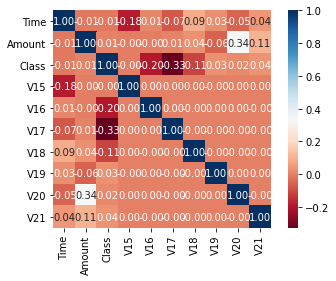

In [20]:
sns.heatmap(corr, cmap='RdBu', fmt='0.2f', square=True, linecolor='white', annot=True);

In [21]:
corr = df[['Time', 'Amount', 'Class', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].corr()
display(corr)

,Time,Amount,Class,V22,V23,V24,V25,V26,V27,V28
Time,1.000000,-0.010596,-0.012323,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03
Amount,-0.010596,1.000000,0.005632,-6.480065e-02,-1.126326e-01,5.146217e-03,-4.783686e-02,-3.208037e-03,2.882546e-02,1.025822e-02
Class,-0.012323,0.005632,1.000000,8.053175e-04,-2.685156e-03,-7.220907e-03,3.307706e-03,4.455398e-03,1.757973e-02,9.536041e-03
V22,0.144059,-0.064801,0.000805,1.000000e+00,3.130812e-16,1.150829e-17,-6.078986e-16,-8.477050e-16,-1.294910e-16,-3.021376e-16
V23,0.051142,-0.112633,-0.002685,3.130812e-16,1.000000e+00,-4.411271e-17,-9.938362e-16,8.848700e-16,5.524044e-16,9.029821e-16
V24,-0.016182,0.005146,-0.007221,1.150829e-17,-4.411271e-17,1.000000e+00,1.557318e-15,3.129195e-16,-3.736529e-16,-2.259275e-16
V25,-0.233083,-0.047837,0.003308,-6.078986e-16,-9.938362e-16,1.557318e-15,1.000000e+00,2.810884e-15,-6.107118e-16,3.399375e-16
V26,-0.041407,-0.003208,0.004455,-8.477050e-16,8.848700e-16,3.129195e-16,2.810884e-15,1.000000e+00,-3.383861e-16,-3.751403e-16
V27,-0.005135,0.028825,0.017580,-1.294910e-16,5.524044e-16,-3.736529e-16,-6.107118e-16,-3.383861e-16,1.000000e+00,-3.770124e-16
V28,-0.009413,0.010258,0.009536,-3.021376e-16,9.029821e-16,-2.259275e-16,3.399375e-16,-3.751403e-16,-3.770124e-16,1.000000e+00


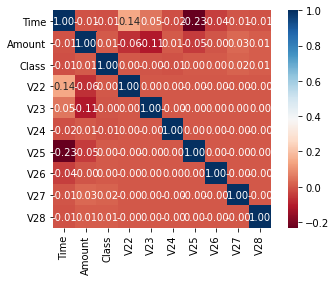

In [22]:
sns.heatmap(corr, cmap='RdBu', fmt='0.2f', square=True, linecolor='white', annot=True);

## Preparação dos Dados

* Inicialmente confirmamos o tamanho do DataFrame e confirmamos que temos 284.807 entradas e 31 variáveis.

In [23]:
# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))


Tamanho de df: (284807, 31)



* Importamos o modelo de regressão linear e dividimos em treino e test.

In [24]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

* Abaixo confirmamos que a quantidade de variáveis em X e y.

In [25]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (284807, 31)
X:		 (284807, 30)
y:		 (284807,)


## **Modelo de Machine Learning**


* Os coeficientes de regressão e o intercepto para cada variável são demonstradas abaixo. Utilizamos o modelo de regressão Linear Múltipla.

In [26]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [-3.25722790e-09 -1.89580916e-03  2.76857115e-03 -4.94463632e-03
  3.70590636e-03 -2.25521017e-03 -1.62979582e-03 -6.68968635e-03
  8.43364914e-04 -3.54834460e-03 -7.94493565e-03  6.12318534e-03
 -1.05767293e-02 -2.01835910e-04 -1.28855458e-02 -3.05469960e-04
 -9.12380157e-03 -1.57627488e-02 -5.52200022e-03  1.82454039e-03
  2.28079046e-04  1.95233503e-03  2.28786927e-04 -3.36744882e-05
 -4.79960053e-04  3.25481400e-04  3.42435410e-04  1.87823459e-03
  9.92466476e-04  7.00574824e-06]
Intercepto:	 0.0013854651752999768


## Avaliar o desempenho do modelo

* Abaixo avaliamos o desemprenho do modelo.

In [27]:
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.5233696214878834
MAE:		 0.00340330972239029
MSE:		 0.0008686387968307777


## Conclusão

* Ao analisar a matriz de correlação identificamos que as variáveis V14 e V17 têm maior correlação com a variável Class que identifica se houve ou não fraude.

* O modelo de correlação R2